In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

print("Pandas Version: " + pd.__version__)
print("Numpy Version: " + np.__version__)

Pandas Version: 1.1.2
Numpy Version: 1.19.2


### From the [Dark Sky API](https://darksky.net/dev/docs#response-format)

* `precipIntensity`: The intensity of precipitation occurring at the given time. This value is conditional on probability (that is, assuming any precipitation occurs at all).
* `precipProbability`: The probability of precipitation occurring, between 0 and 1, inclusive.
* `precipType`: The type of precipitation occurring at the given time. If defined, this property will have one of the following values: "rain", "snow", or "sleet" (which refers to each of freezing rain, ice pellets, and “wintery mix”). (If precipIntensity is zero, then this property will not be defined. Additionally, due to the lack of data in our sources, historical `precipType` information is usually estimated, rather than observed.)
* `precipAccumulation`: The amount of snowfall accumulation expected to occur (over the hour or day, respectively). (If no snowfall is expected, this property will not be defined.)
* `temperature`: The air temperature.
* `apparentTemperature`: The apparent (or “feels like”) temperature.
* `dewPoint`: The dew point.
* `humidity`: The relative humidity, between 0 and 1, inclusive.
* `windSpeed`: The wind speed.
* `windGust`: The wind gust speed.
* `windBearing`: The direction that the wind is coming from in degrees, with true north at 0° and progressing clockwise. (If windSpeed is zero, then this value will not be defined.)
* `uvIndex`: The UV index.
* `cloudCover`: The percentage of sky occluded by clouds, between 0 and 1, inclusive.
* `pressure`: The sea-level air pressure.
* `visibility`: The average visibility, capped at 16.093 Kilometers (10 miles).

SI units are as follows:

* `precipIntensity`: Millimeters per hour.
* `precipAccumulation`: Centimeters.
* `temperature`: Degrees Celsius.
* `apparentTemperature`: Degrees Celsius.
* `dewPoint`: Degrees Celsius.
* `windSpeed`: Meters per second.
* `pressure`: Hectopascals.
* `visibility`: Kilometers.

In [2]:
df = pd.read_csv("../data/weather.csv", index_col=0, parse_dates=True)

In [3]:
df.describe()

,precip_intensity,precip_probability,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
count,29567.000000,29567.000000,266.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29443.000000,29251.000000,26867.000000,29512.000000,22844.000000,15072.000000
mean,0.034906,0.035311,0.042020,10.103162,8.749078,6.098258,0.783620,3.571998,3.926338,192.993915,0.728291,8.998252,0.622383,1015.060264
std,0.170882,0.098733,0.120915,7.068134,8.393069,6.015707,0.159837,2.101460,2.739338,89.171872,1.442830,2.218405,0.253200,9.627763
min,0.000000,0.000000,0.002300,-12.080000,-19.100000,-15.240000,0.230000,0.000000,0.000000,0.000000,0.000000,0.099000,0.000000,972.100000
25%,0.000000,0.000000,0.004825,4.950000,2.080000,1.580000,0.680000,2.000000,2.060000,114.000000,0.000000,9.595000,0.440000,1009.400000
50%,0.000000,0.000000,0.008250,9.690000,8.320000,6.000000,0.820000,3.190000,3.350000,219.000000,0.000000,10.003000,0.750000,1015.800000
75%,0.000000,0.000000,0.019350,15.110000,15.130000,10.860000,0.910000,4.760000,4.890000,260.000000,1.000000,10.003000,0.750000,1021.400000
max,6.925600,1.000000,1.360700,36.420000,36.650000,23.400000,1.000000,14.470000,25.970000,359.000000,7.000000,16.093000,1.000000,1051.400000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29567 entries, 2014-01-01 00:00:00+01:00 to 2017-05-16 23:00:00+02:00
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   precip_intensity      29567 non-null  float64
 1   precip_probability    29567 non-null  float64
 2   precip_type           6856 non-null   object 
 3   precip_accumulation   266 non-null    float64
 4   temperature           29567 non-null  float64
 5   apparent_temperature  29567 non-null  float64
 6   dew_point             29567 non-null  float64
 7   humidity              29567 non-null  float64
 8   wind_speed            29567 non-null  float64
 9   wind_gust             29443 non-null  float64
 10  wind_bearing          29251 non-null  float64
 11  uv_index              26867 non-null  float64
 12  visibility            29512 non-null  float64
 13  cloud_cover           22844 non-null  float64
 14  pressure              15072 non

In [5]:
df.head(5)

,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
datetime,,,,,,,,,,,,,,,
2014-01-01 00:00:00+01:00,0.0,0.0,NaN,NaN,1.93,-1.86,-1.06,0.81,3.91,3.91,161.0,0.0,9.988,NaN,NaN
2014-01-01 01:00:00+01:00,0.0,0.0,NaN,NaN,1.94,-2.24,-0.33,0.85,4.56,4.56,140.0,0.0,6.004,NaN,NaN
2014-01-01 02:00:00+01:00,0.0,0.0,NaN,NaN,1.81,-2.14,-0.47,0.85,4.12,4.12,143.0,0.0,9.988,NaN,NaN
2014-01-01 03:00:00+01:00,0.0,0.0,NaN,NaN,1.75,-1.92,-1.16,0.81,3.70,3.70,154.0,0.0,9.988,NaN,NaN
2014-01-01 04:00:00+01:00,0.0,0.0,NaN,NaN,1.72,-2.40,-0.99,0.82,4.36,4.36,149.0,0.0,9.988,NaN,NaN


In [6]:
df.tail(5)

,precip_intensity,precip_probability,precip_type,precip_accumulation,temperature,apparent_temperature,dew_point,humidity,wind_speed,wind_gust,wind_bearing,uv_index,visibility,cloud_cover,pressure
datetime,,,,,,,,,,,,,,,
2017-05-16 19:00:00+02:00,0.0205,0.09,rain,NaN,16.36,16.36,13.87,0.85,1.98,2.17,127.0,NaN,10.003,NaN,NaN
2017-05-16 20:00:00+02:00,0.0000,0.00,NaN,NaN,16.36,16.36,13.71,0.84,1.95,2.04,123.0,NaN,10.003,NaN,NaN
2017-05-16 21:00:00+02:00,0.0000,0.00,NaN,NaN,16.14,16.14,13.81,0.86,2.01,2.01,119.0,NaN,10.003,NaN,NaN
2017-05-16 22:00:00+02:00,0.0000,0.00,NaN,NaN,15.68,15.68,13.20,0.85,2.46,2.46,131.0,0.0,10.003,NaN,NaN
2017-05-16 23:00:00+02:00,0.0000,0.00,NaN,NaN,15.67,15.67,13.35,0.86,1.47,1.68,144.0,0.0,10.003,NaN,NaN


In [7]:
def display_nan_stats(data_frame):
    stats = pd.DataFrame(data_frame.isnull().sum())
    stats.columns = ['NaN values']
    stats['% missing'] = round((stats['NaN values'] / data_frame.shape[0]) * 100, 2)
    return stats

In [8]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,22711,76.81
precip_accumulation,29301,99.10
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_gust,124,0.42


In [9]:
df.loc[df.precip_type.isna()][['precip_probability']].describe()

,precip_probability
count,22711.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [10]:
# If the type of precipitation is NaN, the probability of precipitation is always 0.
# We assume that there was no precipitation and add replace NaN with 'none'.

df.fillna({'precip_type': 'none'}, inplace=True)

In [11]:
# If the probability of precipitation is 0 we also assume that the precipitation accumulation is 0.

condition = (df['precip_accumulation'].isna()) & (df['precip_type'] == 'none')
df.loc[condition, 'precip_accumulation'] = 0.0

In [12]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
precip_accumulation,6590,22.29
temperature,0,0.00
apparent_temperature,0,0.00
dew_point,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_gust,124,0.42


<AxesSubplot:xlabel='precip_intensity', ylabel='precip_accumulation'>

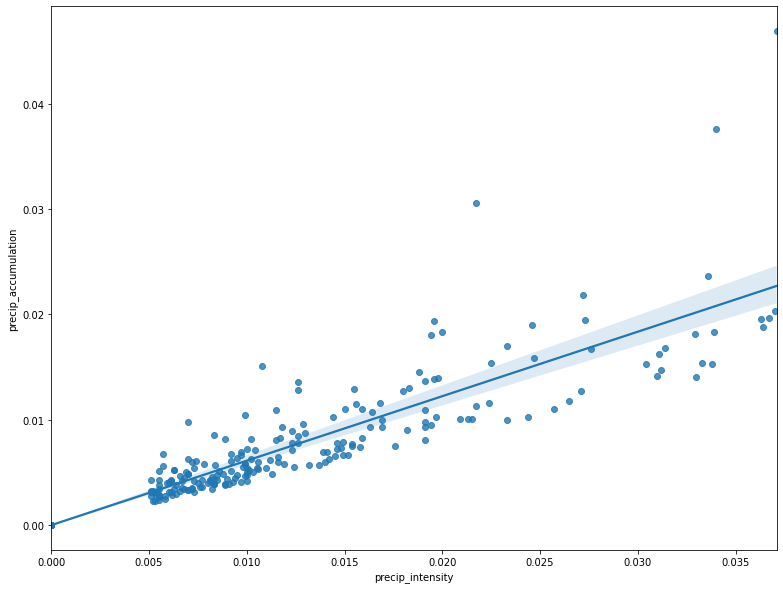

In [13]:
plt.figure(figsize=(13, 10))
tmp = df.loc[df.precip_intensity <= df.precip_intensity.quantile(0.9)]
sns.regplot(data=tmp, x='precip_intensity', y='precip_accumulation')

# 'precip_intensity' and 'precip_accumulation' seem to be linearly correlated.
# If bike trips are relating to one of these columns, having the other one present in the data set as well
# is not favourable (multicollinearity). Since 22% of the 'precip_accumulation' values are missing, the
# column will be dropped entirely.

In [14]:
df.drop('precip_accumulation', axis=1, inplace=True)

<AxesSubplot:xlabel='temperature', ylabel='apparent_temperature'>

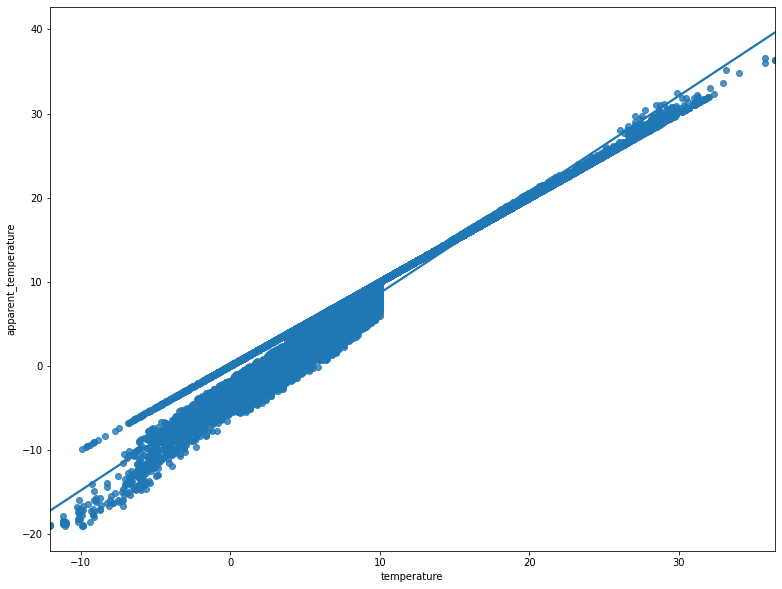

In [15]:
plt.figure(figsize=(13, 10))
sns.regplot(data=df, x='temperature', y='apparent_temperature')

In [16]:
# 'temperature' and 'apparent_temperature' are heavily correlated as well, so 'apparent_temperature' will be dropped.

df.drop('apparent_temperature', axis=1, inplace=True)

<AxesSubplot:xlabel='temperature', ylabel='dew_point'>

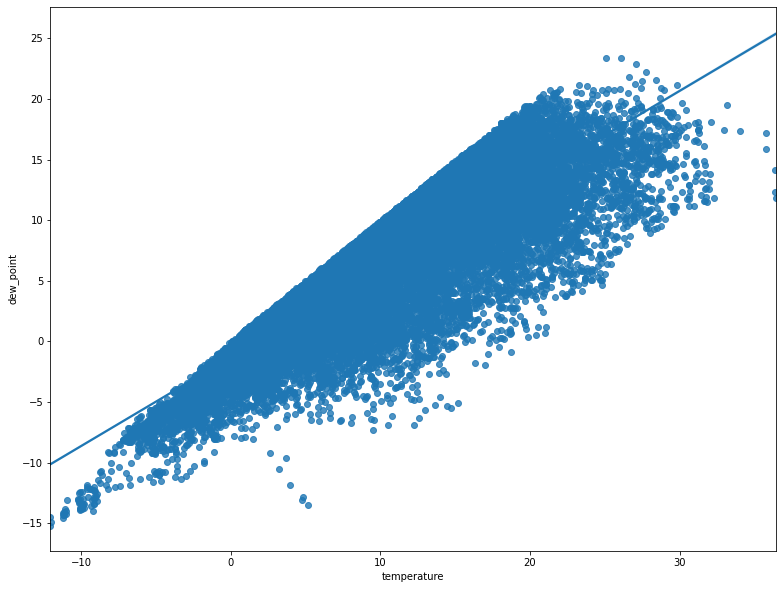

In [17]:
plt.figure(figsize=(13, 10))
sns.regplot(data=df, x='temperature', y='dew_point')

In [18]:
# 'temperature' and 'dew_point' are heavily correlated as well, so 'dew_point' will be dropped.

df.drop('dew_point', axis=1, inplace=True)

<AxesSubplot:xlabel='wind_speed', ylabel='wind_gust'>

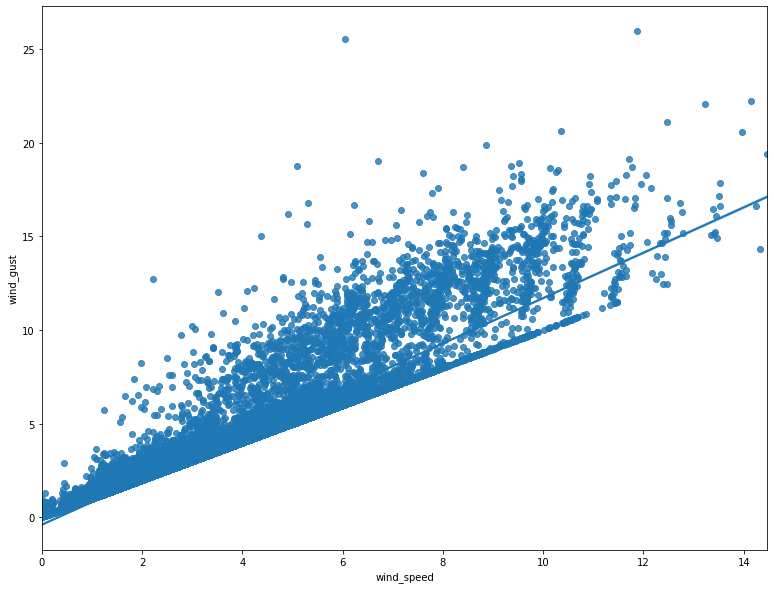

In [19]:
plt.figure(figsize=(13, 10))
sns.regplot(data=df, x='wind_speed', y='wind_gust')

In [20]:
# 'wind_speed' and 'wind_gust' are heavily correlated as well, so 'wind_gust' will be dropped.

df.drop('wind_gust', axis=1, inplace=True)

In [21]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
temperature,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_bearing,316,1.07
uv_index,2700,9.13
visibility,55,0.19
cloud_cover,6723,22.74


<AxesSubplot:xlabel='datetime'>

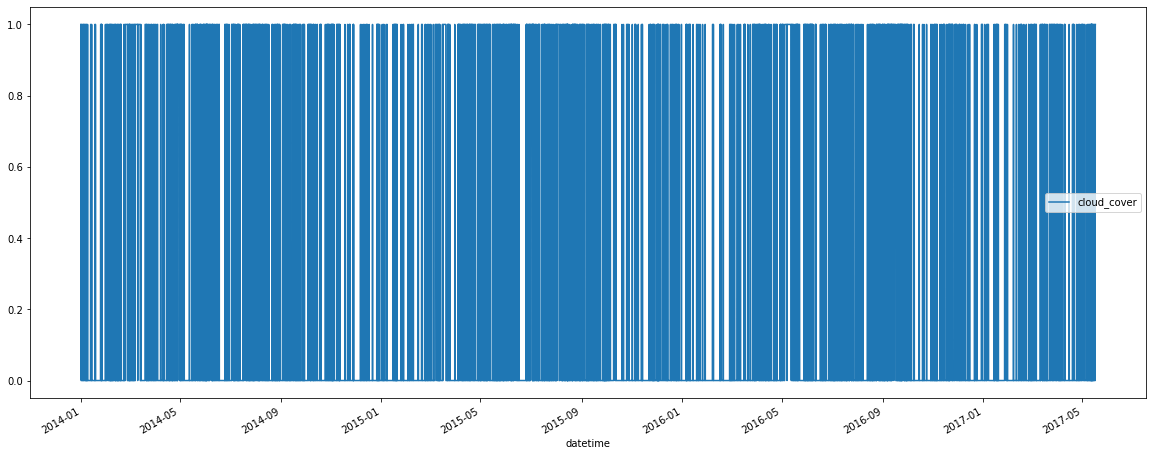

In [22]:
# Display missing 'cloud_cover' as a barcode-like graph.
# A visible bar indicates a missing value

tmp = df[['cloud_cover']].copy()
tmp['cloud_cover'] = np.where(tmp['cloud_cover'].isna(), 1.0, 0.0)
tmp.plot(figsize=(20, 8))

In [23]:
# Interpolate missing values in both directions with a limit of 12 hours.

df.interpolate(limit_direction='both', inplace=True, limit=12)

In [24]:
display_nan_stats(df)

,NaN values,% missing
precip_intensity,0,0.00
precip_probability,0,0.00
precip_type,0,0.00
temperature,0,0.00
humidity,0,0.00
wind_speed,0,0.00
wind_bearing,0,0.00
uv_index,0,0.00
visibility,0,0.00
cloud_cover,823,2.78


In [25]:
# Since the gaps in the 'cloud_cover' column are too large, it will be dropped as well.

df.drop('cloud_cover', axis=1, inplace=True)

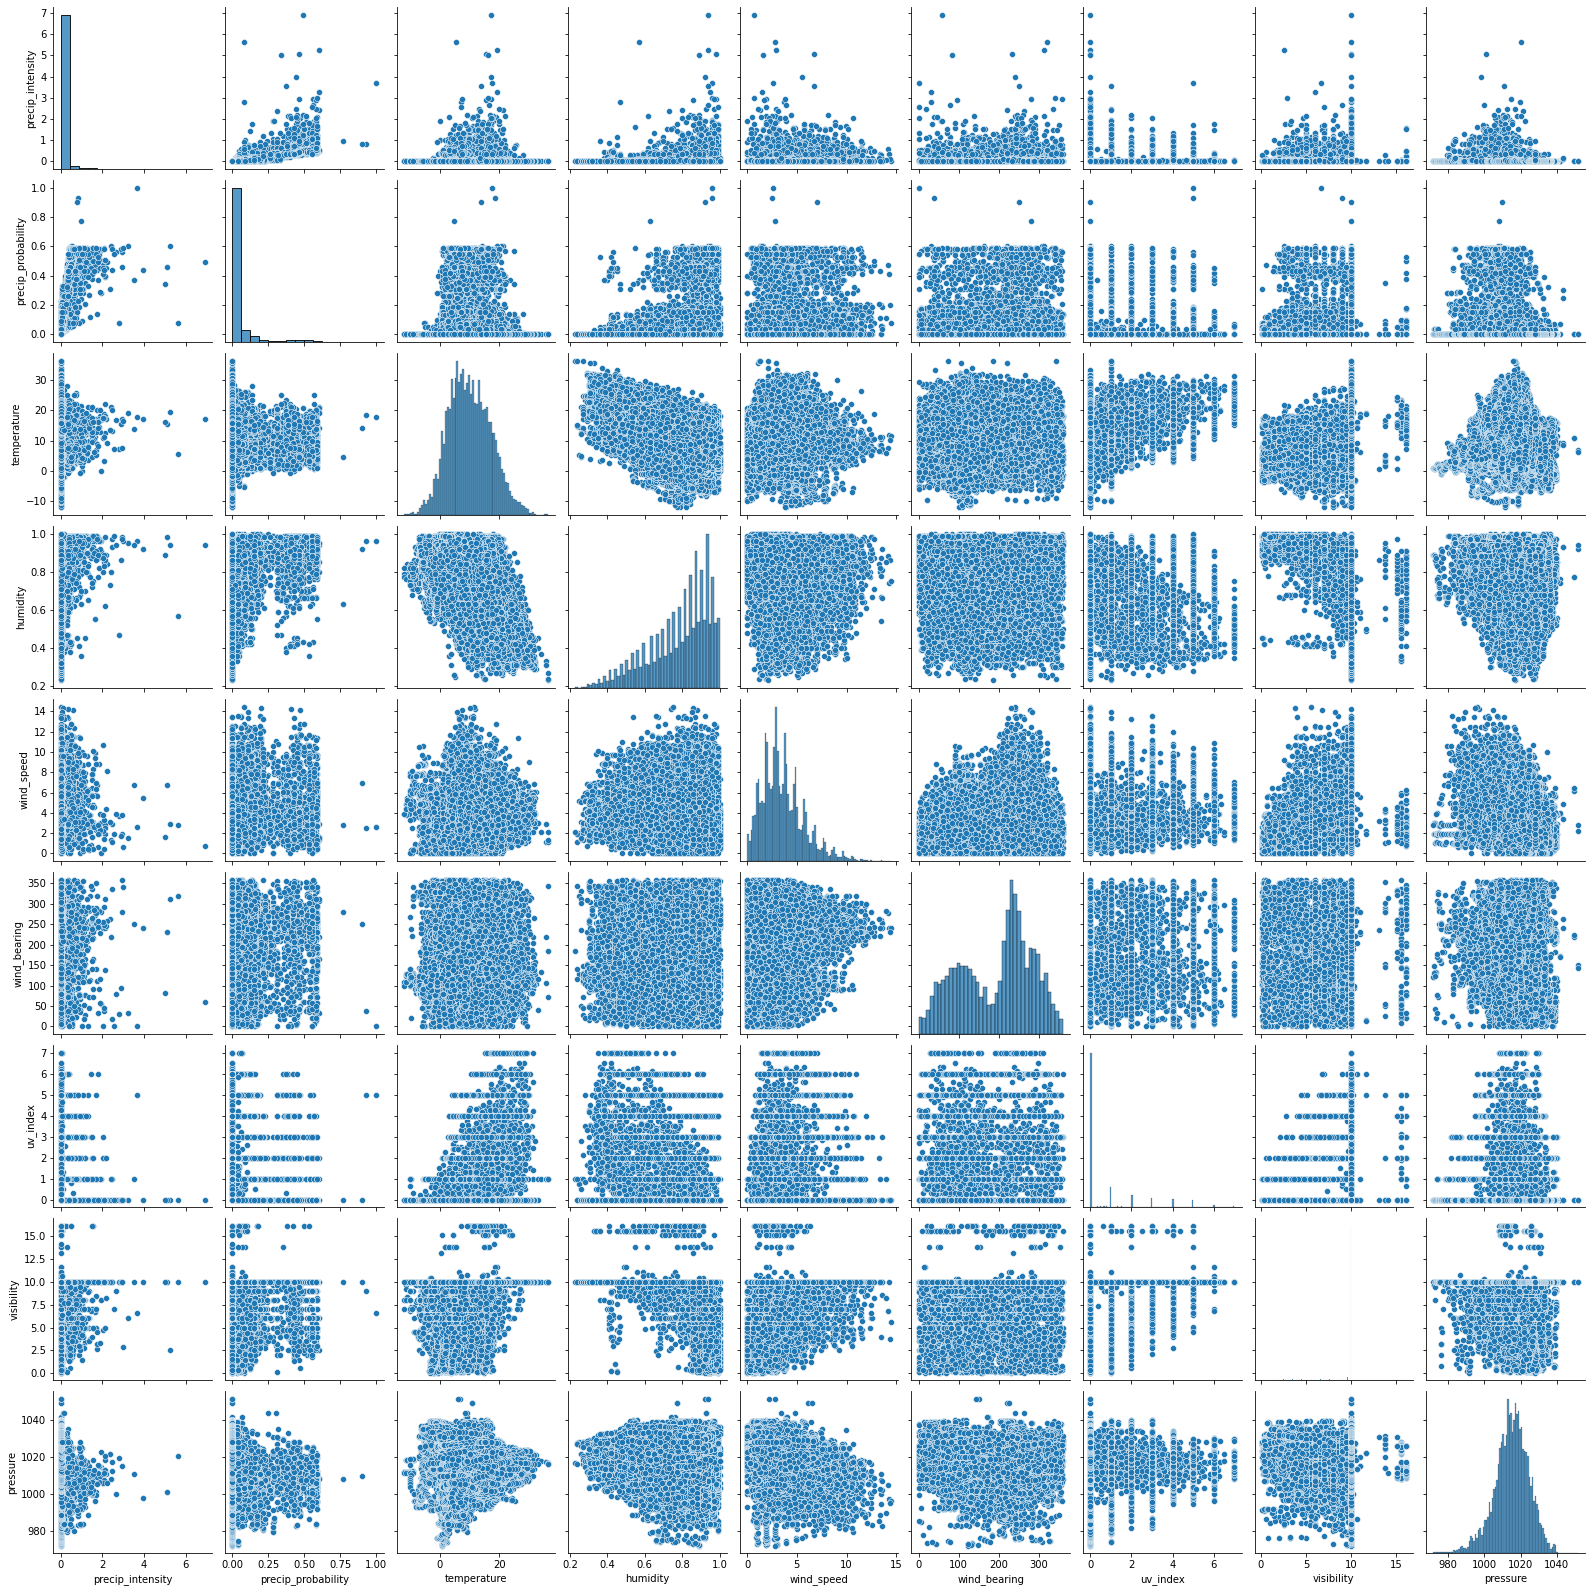

In [26]:
# Investigate the remaining columns

sns.pairplot(df)

In [27]:
df.describe()

,precip_intensity,precip_probability,temperature,humidity,wind_speed,wind_bearing,uv_index,visibility,pressure
count,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,29567.000000,22323.000000
mean,0.034906,0.035311,10.103162,0.783620,3.571998,193.017131,0.762353,8.997781,1015.186760
std,0.170882,0.098733,7.068134,0.159837,2.101460,89.208890,1.445420,2.218851,9.589305
min,0.000000,0.000000,-12.080000,0.230000,0.000000,0.000000,0.000000,0.099000,972.100000
25%,0.000000,0.000000,4.950000,0.680000,2.000000,114.000000,0.000000,9.595000,1009.535991
50%,0.000000,0.000000,9.690000,0.820000,3.190000,219.000000,0.000000,10.003000,1015.691304
75%,0.000000,0.000000,15.110000,0.910000,4.760000,260.500000,1.000000,10.003000,1021.531481
max,6.925600,1.000000,36.420000,1.000000,14.470000,359.000000,7.000000,16.093000,1051.400000


In [28]:
df.to_csv("../data/clean/weather.csv", index=False)